<a href="https://colab.research.google.com/github/AcimGithub/PCVK_Genap_2023/blob/main/BadSmokeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

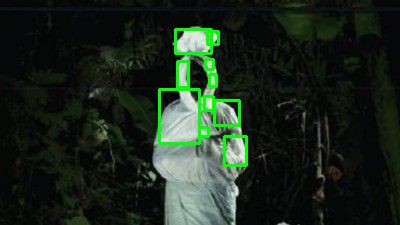

In [33]:
import cv2
from google.colab.patches import cv2_imshow

# Fungsi untuk mendeteksi asap pada citra
def detect_smoke(image_path):
    # Baca citra menggunakan OpenCV
    image = cv2.imread(image_path)

    # Ubah citra ke skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Terapkan thresholding untuk mendeteksi asap
    _, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

    # Temukan kontur pada citra
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop melalui kontur dan deteksi asap
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 15:  # Atur threshold area sesuai kebutuhan
            # Gambar kotak pembatas di sekitar asap
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Tampilkan citra dengan kotak pembatas asap
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Contoh pemanggilan fungsi dengan nama file citra sebagai argumen
if __name__ == "__main__":
    image_path = "/content/asapnipu.png"  # Ganti dengan path file citra Anda
    detect_smoke(image_path)
